#Installs and Imports

In [ ]:
!pip install matplotlib seaborn

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn

#Functions

In [ ]:
def matrix_creation():
  # Generate random 30x25 matrix
  x = np.random.randn(30, 25).astype(np.float32)
  # Scale values to be in range of typical embeddings
  x = x * np.sqrt(25)
  # Adjust range to be -2 to 2
  x = x - 1
  x = torch.from_numpy(x)
  return x

In [ ]:
def linear_transformation(x, plot):
  linear0 = nn.Linear(25, 40)
  linear1 = nn.Linear(25, 40)
  linear2 = nn.Linear(25, 40)
  query = linear0(x)
  key = linear1(x)
  value = linear2(x)


  if plot == True:
    # Create a heatmap
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    map0 = sns.heatmap(query.detach().numpy(), cmap="YlGnBu", ax=axes[0])
    axes[0].set_title("Query (post-linear transformation)")

    vmin, vmax = map0.collections[0].get_clim()

    sns.heatmap(key.detach().numpy(), cmap="YlGnBu", ax=axes[1], vmin = vmin, vmax = vmax)
    axes[1].set_title("Key (post-linear transformation)")

    sns.heatmap(value.detach().numpy(), cmap="YlGnBu", ax=axes[2], vmin = vmin, vmax = vmax)
    axes[2].set_title("Value (post-linear transformation)")

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()
    print('/n')
  return query, key, value

In [ ]:
def mask_creation(plot):
  mask = torch.tril(torch.ones(30, 30), diagonal=0) == 0


  if plot == True:
    # Create a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(mask.detach().numpy(), cmap="YlGnBu")
    plt.title("Created Mask")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.show()
  return mask

In [ ]:
def scores(query, key, mask, plot):
  scores = torch.matmul(query, key.t())
  scoresmask = scores.masked_fill(mask, float('-inf'))

  rootdmask = scoresmask*(900**-0.5)
  softmask = torch.nn.functional.softmax(rootdmask, dim=1)

  rootdnom = scores*(900**-0.5)
  softnom = torch.nn.functional.softmax(rootdnom, dim=1)


  if plot == True:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    map1 = sns.heatmap(scores.detach().numpy(), cmap="YlGnBu", ax=axes[0])
    axes[0].set_title("Scores")

    vmin, vmax = map1.collections[0].get_clim()

    sns.heatmap(scoresmask.detach().numpy(), cmap="YlGnBu", vmin = vmin, vmax = vmax)
    axes[1].set_title("Scores - Masked")

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    map2 = sns.heatmap(rootdnom.detach().numpy(), cmap="YlGnBu", ax=axes[0])
    axes[0].set_title("Scaled")

    vmin, vmax = map2.collections[0].get_clim()

    sns.heatmap(rootdmask.detach().numpy(), cmap="YlGnBu", ax=axes[1], vmin = vmin, vmax = vmax)
    axes[1].set_title("Scaled - Masked")

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    map3 = sns.heatmap(softnom.detach().numpy(), cmap="YlGnBu", ax=axes[0])
    axes[0].set_title("Softmaxed")

    vmin, vmax = map3.collections[0].get_clim()

    sns.heatmap(softmask.detach().numpy(), cmap="YlGnBu", ax=axes[1], vmin = vmin, vmax = vmax)
    axes[1].set_title("Softmaxed - Masked")

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()
  return softnom, softmask

In [ ]:
def outputCalc(softnom, softmask, value, plot):
  weightsnom = torch.matmul(softnom,value)
  weightsmask = torch.matmul(softmask,value)
  difference = weightsmask - weightsnom

  if plot == True:
    # Create a heatmap
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    map4 = sns.heatmap(weightsmask.detach().numpy(), cmap="YlGnBu", ax=axes[0])
    axes[0].set_title("Heatmap of masked")

    vmin, vmax = map4.collections[0].get_clim()

    sns.heatmap(weightsnom.detach().numpy(), cmap="YlGnBu", ax=axes[1], vmin = vmin, vmax = vmax)
    axes[1].set_title("No mask here")

    sns.heatmap(difference.detach().numpy(), cmap="YlGnBu", ax=axes[2], vmin = vmin, vmax = vmax)
    axes[2].set_title("Heatmap of difference")

    #sns.heatmap(overlay.detach().numpy(), cmap="YlGnBu", ax=axes[3])
    #axes[3].set_title("Heatmap of overlayed")

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

In [ ]:
def runStuff(plot, plotfinal):
  x = matrix_creation()
  q, k, v = linear_transformation(x, plot)
  mask = mask_creation(plot)
  softnom, softmask = scores(q, k, mask, plot)
  outputCalc(softnom, softmask, v, plotfinal)

#Testing/Running

In [ ]:
#function name (show interim plots (boolean), show final plots (boolean))
#runStuff(True, True)

In [ ]:
plot = plotFinal = True

In [ ]:
x = matrix_creation()

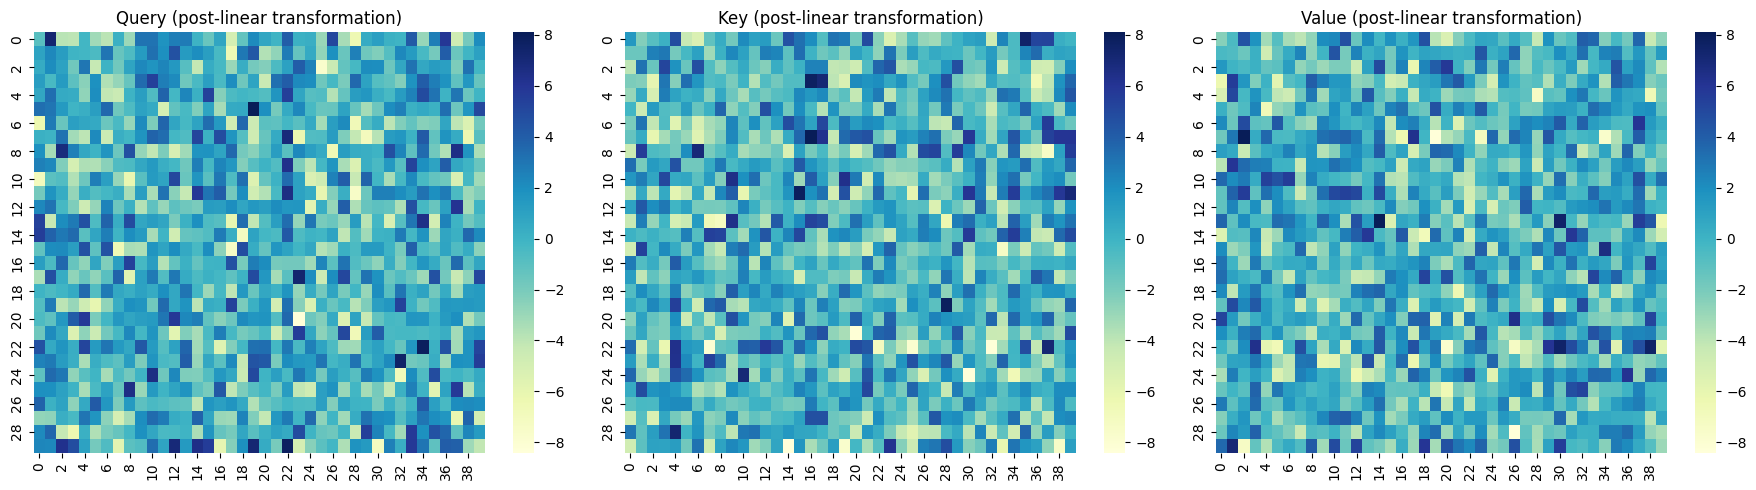

/n


In [ ]:
q, k, v = linear_transformation(x, plot)

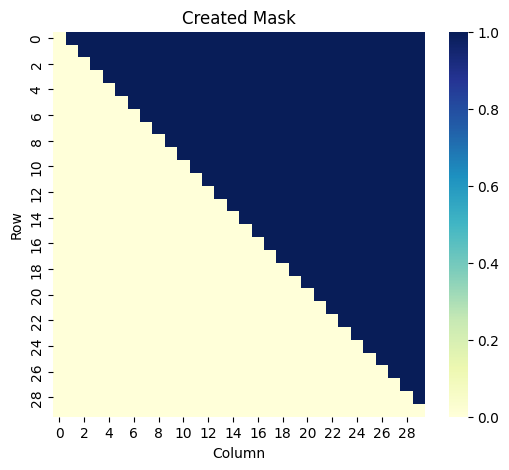

In [ ]:
mask = mask_creation(plot)

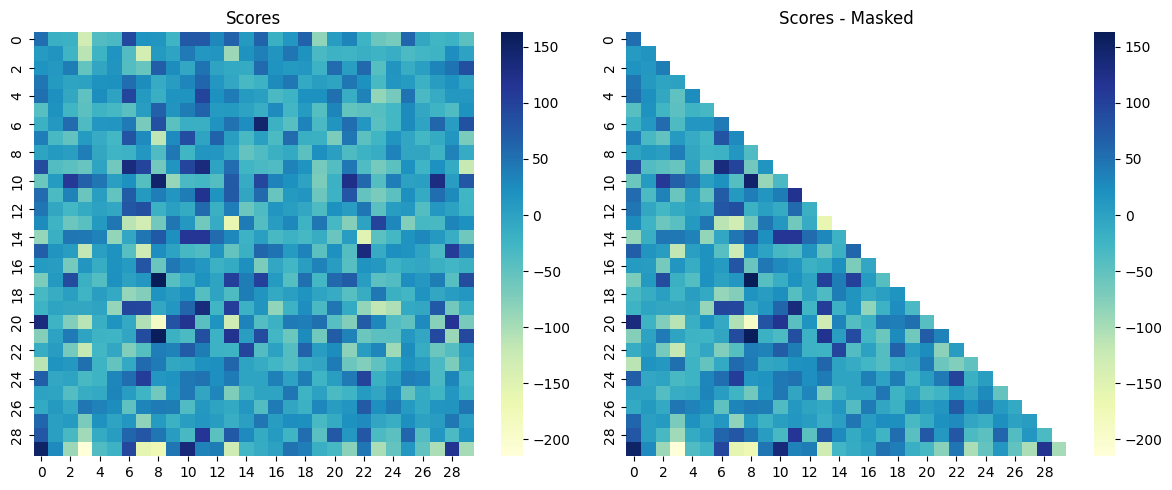

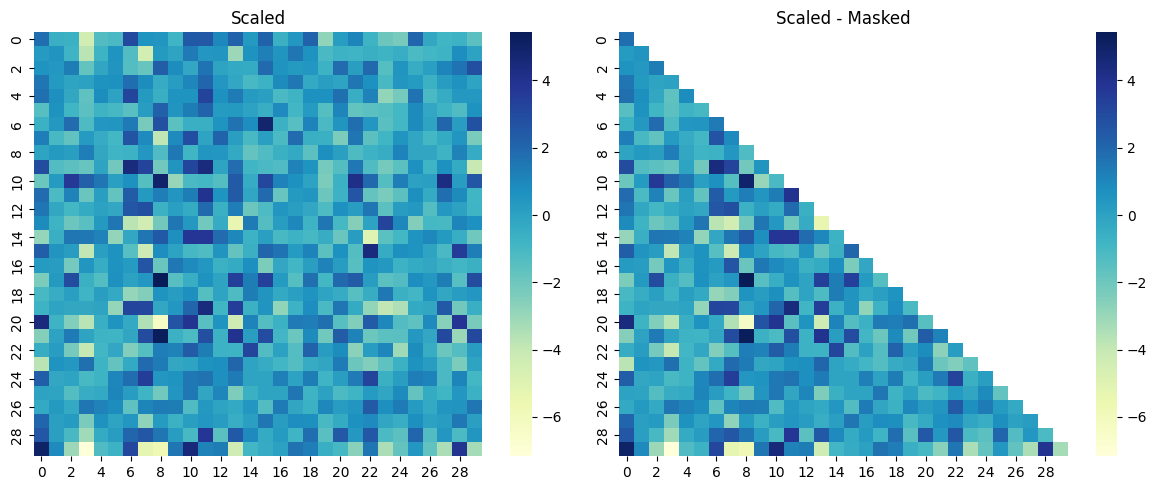

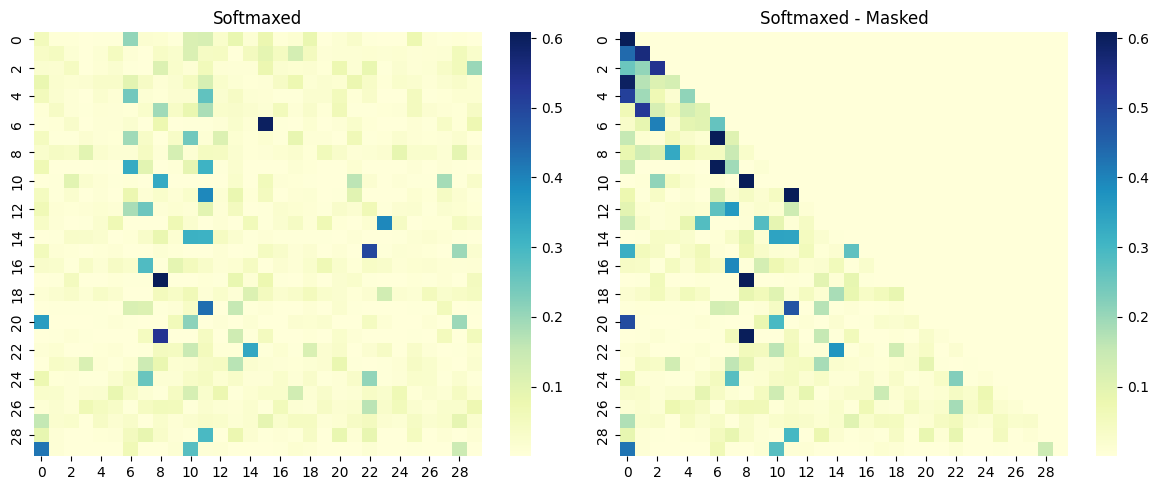

In [ ]:
softnom, softmask = scores(q, k, mask, plot)

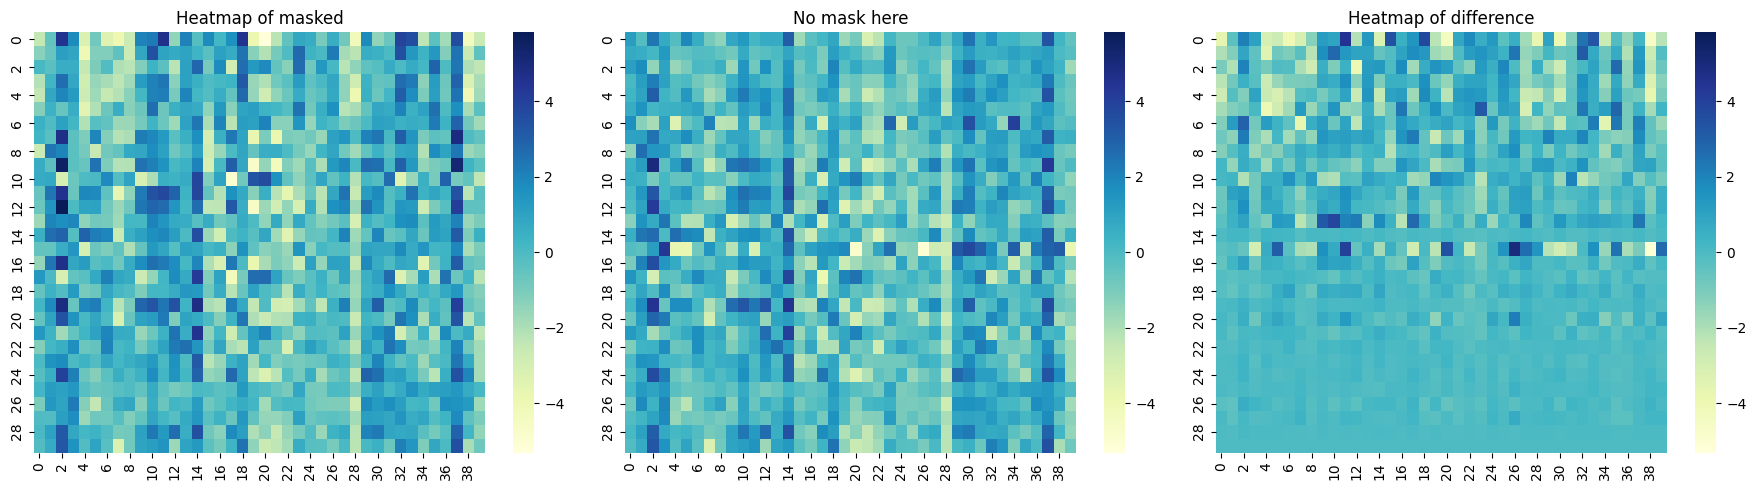

In [ ]:
outputCalc(softnom, softmask, v, plotFinal)

#Final Output comparisons

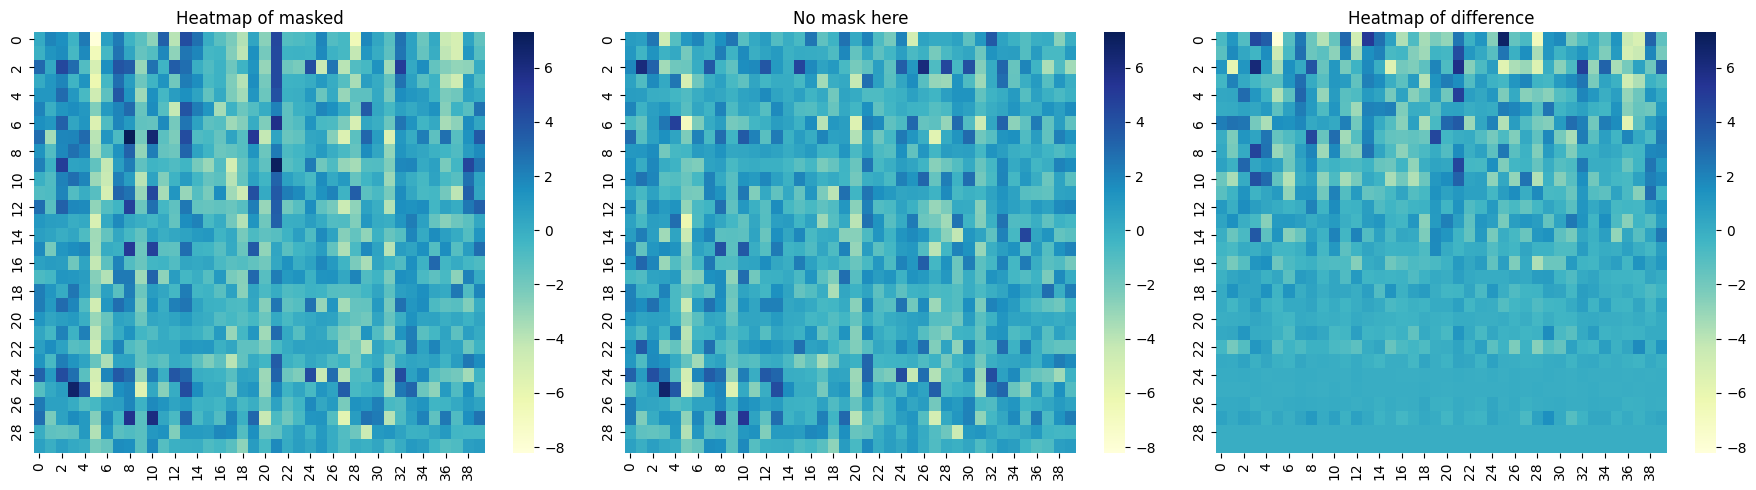

In [ ]:
runStuff(False, True)